In [1]:
%matplotlib inline


# Plot multinomial and One-vs-Rest Logistic Regression

Plot decision surface of multinomial and One-vs-Rest Logistic Regression.
The hyperplanes corresponding to the three One-vs-Rest (OVR) classifiers
are represented by the dashed lines.


training score : 0.995 (multinomial)
training score : 0.976 (ovr)


C:\Users\RACHIT\AppData\Local\Temp\ipykernel_11464\3308774751.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\RACHIT\AppData\Local\Temp\ipykernel_11464\3308774751.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


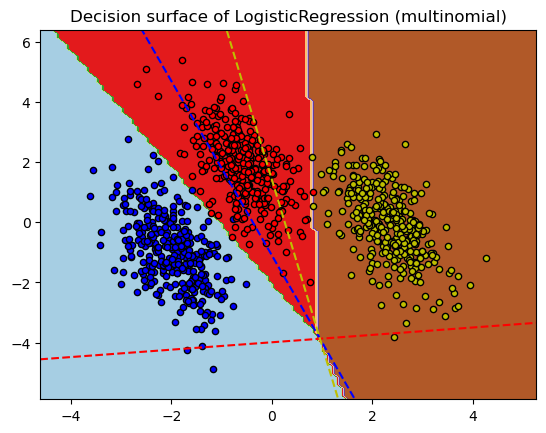

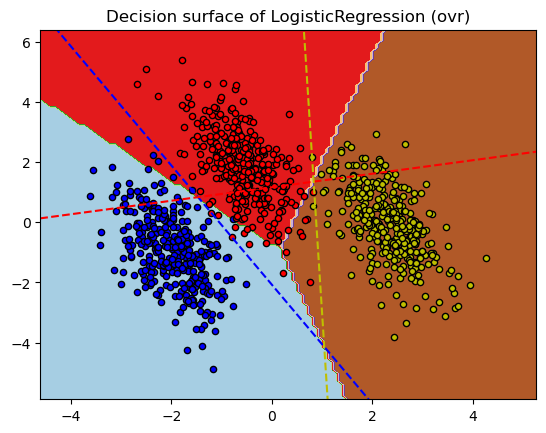

In [2]:
# Authors: Tom Dupre la Tour <tom.dupre-la-tour@m4x.org>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

for multi_class in ("multinomial", "ovr"):
    clf = LogisticRegression(
        solver="sag", max_iter=100, random_state=42, multi_class=multi_class
    ).fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf, X, response_method="predict", cmap=plt.cm.Paired, ax=ax
    )
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis("tight")

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()